loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


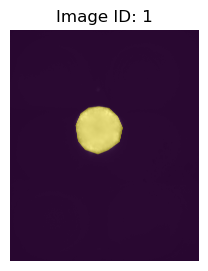

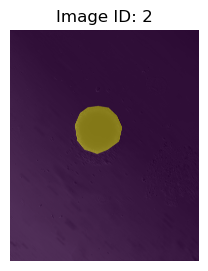

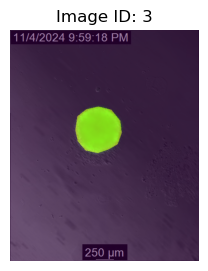

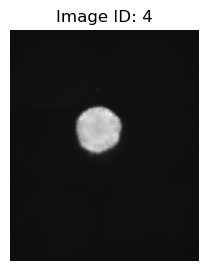

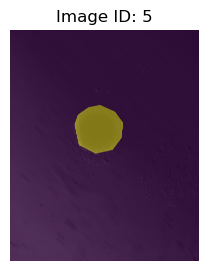

In [10]:
# Cell 1: Imports, Loading COCO Annotations, and Data Visualization (Resized Images)

# conda install -c conda-forge opencv
# conda install pytorch torchvision torchaudio cpuonly -c pytorch
# conda install -c conda-forge pycocotools

import json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path

# set up the path to the COCO-formatted annotation file 
annotation_file = Path("/Users/ellielin/Desktop/stik_gui/annotations/instances_default.json")
image_dir = Path("/Users/ellielin/Desktop/stik_gui/C3_jpg")

# load and display categories (invasion area)
coco = COCO(annotation_file);
image_ids = coco.getImgIds()

# process all images
for image_id in image_ids[:5]:
    image_info = coco.loadImgs(image_id)[0]
    image_filename = image_info['file_name']
    image_path = image_dir / image_filename
    
    image = cv2.imread(str(image_path))
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    plt.figure(figsize=(4,3))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for ann in annotations:
        mask = coco.annToMask(ann)
        plt.imshow(mask, alpha=0.5) # overlay annotation mask
    
    plt.title(f"Image ID: {image_id}")
    plt.axis("off")
    plt.show()

In [13]:
import detectron2
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer
from pycocotools.coco import COCO

# Initialize the Detectron2 logger
setup_logger()

# Load the COCO dataset
def get_coco_dicts(img_dir, json_file):
    # This function should be adapted to load your COCO annotations properly
    coco = COCO(json_file)
    dataset_dicts = []
    for img_id in coco.getImgIds():
        record = {}
        # Load image metadata and annotations here
        # Add to `dataset_dicts`
    return dataset_dicts

# Unregister the dataset if it is already registered
dataset_name = "coco_train"
if dataset_name in DatasetCatalog.list():
    DatasetCatalog.remove(dataset_name)

# Register dataset (you can register train, val, and test datasets separately)
DatasetCatalog.register(dataset_name, lambda: get_coco_dicts("path_to_images", "path_to_annotations/instances_train2017.json"))
MetadataCatalog.get(dataset_name).set(thing_classes=category_names)

cfg = get_cfg()
# Load a pre-trained model config from Detectron2 (e.g., Mask R-CNN with a ResNet backbone)
cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = (dataset_name,)
cfg.DATASETS.TEST = ()
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(category_names)  # Set number of classes to match your dataset
cfg.MODEL.WEIGHTS = detectron2.model_zoo.get_checkpoint_url(cfg.MODEL.DEVICE)  # Pre-trained weights
cfg.SOLVER.IMS_PER_BATCH = 8  # Batch size
cfg.SOLVER.BASE_LR = 0.001  # Learning rate
cfg.SOLVER.MAX_ITER = 3000  # Number of iterations

# Create the trainer and start training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


AssertionError: Config file 'detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml' does not exist!